In this notebook we will train a k-nearest neighbors classifier to identify malware.

We load our libraries below.

In [1]:
from sklearn import neighbors
import matplotlib.pyplot as plt

In this notebook code cell, we download our training and test data from GitHub.

In [2]:
!wget https://github.com/mlittmancs/great_courses_ml/raw/master/data/malware-test.csv
!wget https://github.com/mlittmancs/great_courses_ml/raw/master/data/malware-train.csv

--2023-11-21 14:42:41--  https://github.com/mlittmancs/great_courses_ml/raw/master/data/malware-test.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mlittmancs/great_courses_ml/master/data/malware-test.csv [following]
--2023-11-21 14:42:41--  https://raw.githubusercontent.com/mlittmancs/great_courses_ml/master/data/malware-test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11593257 (11M) [text/plain]
Saving to: ‘malware-test.csv’

malware-test.csv    100%[===================>]  11.06M  --.-KB/s    in 0.07s   

2023-11-21 14:42:42 (151 MB/s) - ‘malware-test.csv’ saved [11593257/11593257

We next declare a `getdat` function, which collects the data and labels within the file used for training. We loop over the lines of the given file one by one, splitting each line into components at the commas. The data file uses `pe-malicious` to label the positive instances of malware. So, we use `== "pre-malicious"` to turn those labels into 0/`False` for safe and 1/`True` for malware. The function returns the data and the labels for the file. Since the data is read from the file as a string, each component needs to be converted to a floating point number.


We then use this funciton to get the training and test data used for our model.



In [3]:
def getdat(filename):
    with open(filename, "r") as f:
       data = f.readlines()
    dat = []
    labs = []
    for line in data:
        wordline = line.split(",")
        labs = labs + [wordline[0] == "pe-malicious"]
        dat = dat + [[float(wordline[i]) for i in range(1,len(wordline))]]
    return(dat,labs)
traindat, trainlabs = getdat("malware-train.csv")
testdat, testlabs = getdat("malware-test.csv")

We define a `testscore` function, which calculates the number of correctly classified examples in the test set.

We use this `testscore` function to calculate the accuracy of the model for four different values of k: 1, 5, 7, and 9

In [5]:
def testscore(dat,labs):
    yhats = clf.predict(dat)
    correct = sum([yhats[i] == labs[i] for i in range(len(dat))])
    return(correct)

acc = []
m = 4000
for k in [1,5,7,9]:
    clf = neighbors.KNeighborsClassifier(n_neighbors=k,metric="cosine")
    clf = clf.fit(traindat[:m], trainlabs[:m])
    acc = acc + [[k, testscore(traindat[:m],trainlabs[:m])/m, testscore(testdat,testlabs)/len(testlabs)]]

We plot the accuracy as a function of k below on both the training data (blue) and test data (red).

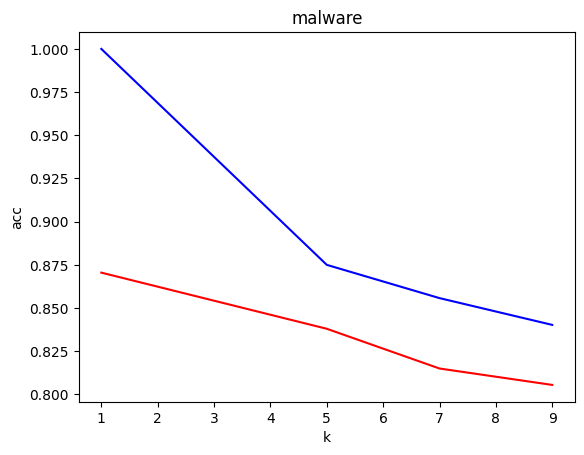

In [6]:
# Plot dependence on k
plt.plot([v[0] for v in acc], [v[1] for v in acc], c="blue")
plt.plot([v[0] for v in acc], [v[2] for v in acc], c="red")
plt.title('malware')
plt.xlabel('k')
plt.ylabel('acc')
plt.show()